<a href="https://colab.research.google.com/github/DasunDhananjaya/Plant-disease-Detection-with-tensorflow/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import opendatasets as od
#{"username":"dasundhananjaya","key":"da66d294956f0d7a53e8aa0f52499723"}
od.download('https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dasundhananjaya
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


100%|██████████| 2.70G/2.70G [00:29<00:00, 99.4MB/s]


In [ ]:
import os

for dirpath,dirnames,filenames in os.walk("/content/new-plant-diseases-dataset"):
  print(f"There are {len(dirnames)} directoris and {len(filenames)} images in {dirpath}.")

There are 3 directoris and 0 images in /content/new-plant-diseases-dataset.
There are 1 directoris and 0 images in /content/new-plant-diseases-dataset/test.
There are 0 directoris and 33 images in /content/new-plant-diseases-dataset/test/test.
There are 1 directoris and 0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented).
There are 2 directoris and 0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented).
There are 38 directoris and 0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train.
There are 0 directoris and 1920 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight.
There are 0 directoris and 1987 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augme

In [ ]:
# Setting up train and validation and test directories

train_dir = "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

validation_dir = "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

test_dir = "/content/new-plant-diseases-dataset/test"

In [ ]:
# Get the class names

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+"/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (256, 256, 3)


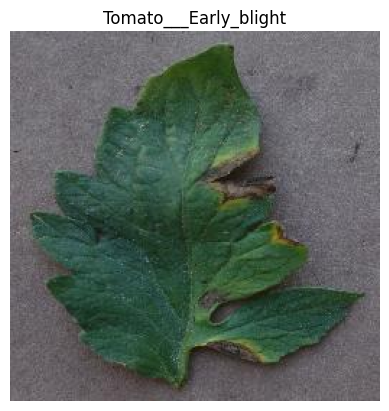

In [ ]:
#Visualize the data

import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

#Preprocess the data(prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale

train_datagen = ImageDataGenerator(1/255.)
test_datagen = ImageDataGenerator(1/255.)

# Load data in from directores and turn it into batches
train_data = train_datagen.flow_from_directory (train_dir,
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode="categorical"
                                              )

validation_data = train_datagen.flow_from_directory (validation_dir,
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode="categorical"
                                              )


test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(256,256),
                                             batch_size=32,
                                             class_mode="categorical")


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 33 images belonging to 1 classes.


#Create a model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Dropout, BatchNormalization


# Create our model (a clone of model_8, except to be multi-class)
# model = Sequential([
#   Conv2D(10, 3, activation='relu', input_shape=(256, 256, 3)),
#   Conv2D(10, 3, activation='relu'),
#   MaxPool2D(),
#   Conv2D(10, 3, activation='relu'),
#   Conv2D(10, 3, activation='relu'),
#   MaxPool2D(),
#   Flatten(),
#   Dense(38,activation='softmax') # changed to have 38 neurons (same as number of classes) and 'softmax' activation
# ])

model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)), # Start with more filters
  BatchNormalization(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Dropout(0.2),  # Introduce dropout for regularization
  Conv2D(64, 5, activation='relu'),  # Experiment with filter size
  BatchNormalization(),
  Conv2D(64, 5, activation='relu'),
  MaxPool2D(),
  Dropout(0.2),
  Flatten(),
  Dense(128, activation='relu'),  # More neurons in the hidden layer
  Dense(38, activation='softmax')
])

# Compile the model
model.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# prompt: genarate a code to fit the model with loss,accuracy,val_loss,val_accuracy

history = model.fit(train_data,
                    epochs=5,
                    validation_data=validation_data,
                    verbose='auto',
                    validation_steps=int(0.25*len(validation_data)),)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


2197/2197 [==============================] - 580s 257ms/step - loss: 2.2240 - accuracy: 0.4792 - val_loss: 1.2913 - val_accuracy: 0.6204
Epoch 2/5
2197/2197 [==============================] - 555s 252ms/step - loss: 0.7200 - accuracy: 0.7783 - val_loss: 0.9378 - val_accuracy: 0.7238
Epoch 3/5
2197/2197 [==============================] - 554s 252ms/step - loss: 0.4174 - accuracy: 0.8679 - val_loss: 1.1601 - val_accuracy: 0.7302
Epoch 4/5
2197/2197 [==============================] - 555s 252ms/step - loss: 0.2767 - accuracy: 0.9135 - val_loss: 0.6575 - val_accuracy: 0.8212
Epoch 5/5
2197/2197 [==============================] - 554s 252ms/step - loss: 0.1954 - accuracy: 0.9399 - val_loss: 0.8992 - val_accuracy: 0.7819


In [ ]:
img_size = 224
batch_size = 32

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input


input_shape = (img_size, img_size, 3)

# Load the EfficientNetB0 model pre-trained on ImageNet data
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

# This is the model we will train
model2 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger

# Define the callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('model_best.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)
tensor_board = TensorBoard(log_dir='./logs')
csv_logger = CSVLogger('training.log')

# Combine them in a list
callbacks_list = [early_stop, model_checkpoint, reduce_lr, tensor_board, csv_logger]

In [ ]:
history2 = model2.fit(
    train_data,
    steps_per_epoch=train_data.samples // batch_size,
    epochs=5,  # Number of epochs to train for
    validation_data=validation_data,
    validation_steps=validation_data.samples // batch_size,
    callbacks=callbacks_list
)

Epoch 1/5
2196/2196 [==============================] - ETA: 0s - loss: 0.2613 - accuracy: 0.9182
Epoch 1: val_loss improved from inf to 0.15587, saving model to model_best.keras
2196/2196 [==============================] - 246s 108ms/step - loss: 0.2613 - accuracy: 0.9182 - val_loss: 0.1559 - val_accuracy: 0.9495 - lr: 0.0010
Epoch 2/5
2196/2196 [==============================] - ETA: 0s - loss: 0.1108 - accuracy: 0.9646
Epoch 2: val_loss improved from 0.15587 to 0.10642, saving model to model_best.keras
2196/2196 [==============================] - 238s 108ms/step - loss: 0.1108 - accuracy: 0.9646 - val_loss: 0.1064 - val_accuracy: 0.9674 - lr: 0.0010
Epoch 3/5
2196/2196 [==============================] - ETA: 0s - loss: 0.0833 - accuracy: 0.9750
Epoch 3: val_loss improved from 0.10642 to 0.08844, saving model to model_best.keras
2196/2196 [==============================] - 232s 106ms/step - loss: 0.0833 - accuracy: 0.9750 - val_loss: 0.0884 - val_accuracy: 0.9739 - lr: 0.0010
Epoch 4/

In [ ]:
# Lets's cearte function to plot our loss curve...
# Tidbit : you could put a function like this into a script called "helper.py" and import it when you need it
import matplotlib.pyplot as plt

# Plot the validation and traing curvers

def plot_loss_curves(history):
  """
  Return separate loos curves for traing and validation metrics.

  Args:
  history: Tensorflow History object.

  REtrues:
  plot of traing/Valiadtieon loss and accuracy metrics

  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #Plot Accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

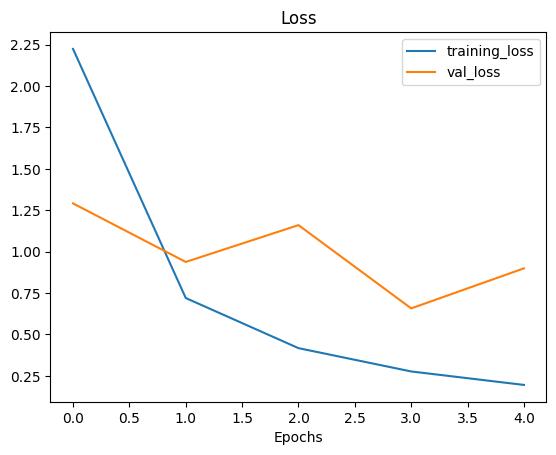

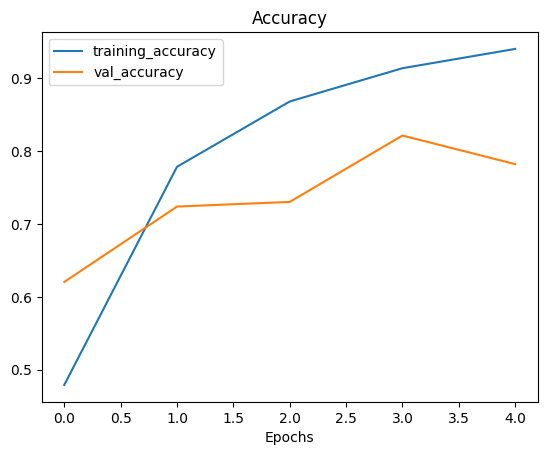

In [ ]:
 plot_loss_curves(history)

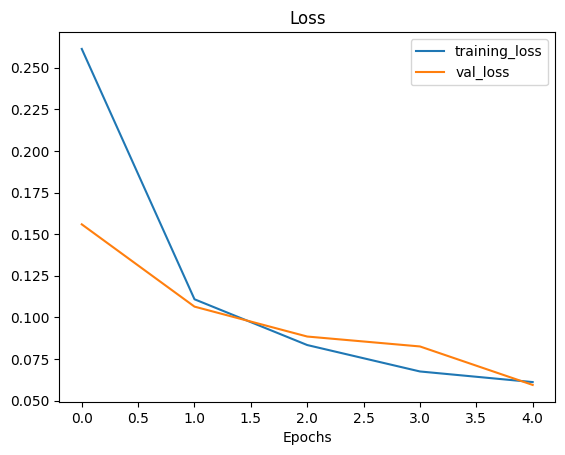

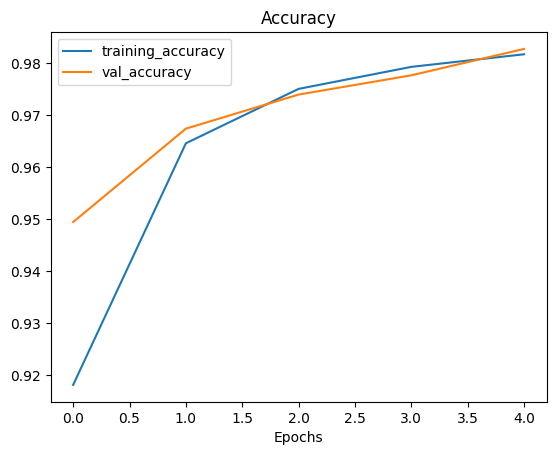

In [ ]:
 plot_loss_curves(history2)

In [ ]:
# model.save('model2H5.h5')
# model.save('model2')

In [ ]:
#model.save('model2')
#model2.save('final_model.h5')

# Model Evaluation

In [ ]:
final_model_path = '/content/drive/MyDrive/Icbt/TOPUP/Final Project/models/final_model.h5'

In [ ]:
model = tf.keras.models.load_model(final_model_path)

In [ ]:
#model.evaluate(validation_data)

# Get the predictions

In [ ]:
from PIL import Image


In [ ]:
print(class_names)

len(class_names)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

38

In [ ]:
image_path = "/content/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG"


In [ ]:
#from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

In [ ]:
# Load the image and preprocess it
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = preprocess_input(x)  # Apply preprocessing specific to EfficientNet
x = np.expand_dims(x, axis=0)  # Add a batch dimension

In [ ]:
# Make predictions
predictions = model.predict(x)

1/1 [==============================] - 3s 3s/step


In [ ]:
predicted_class = np.argmax(predictions[0])
print("Predicted class:", predicted_class)

Predicted class: 2


In [ ]:
class_names[predicted_class]

'Apple___Cedar_apple_rust'

In [ ]:
labels = class_names

# Evaluate the model on the test data
accuracy = model.evaluate(x)

print(accuracy)

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0]


In [ ]:
predicted_class = np.argmax(predictions[0])
predicted_class

2

# testing for streamlit

In [ ]:
def model_prediction(test_image):

    final_model_path = '/content/drive/MyDrive/Icbt/TOPUP/Final Project/models/final_model.h5'
    model = tf.keras.models.load_model(final_model_path)

    # Load the image and preprocess it
    img = image.load_img(test_image, target_size=(224, 224))
    x = image.img_to_array(img)
    x = preprocess_input(x)  # Apply preprocessing specific to EfficientNet
    x = np.expand_dims(x, axis=0)  # Add a batch dimension

    predictions = model.predict(x)

    predicted_class = np.argmax(predictions[0])
    #print("Predicted class:", predicted_class)
    print(class_names[predicted_class])
    print(predicted_class)

In [ ]:
model_prediction(image_path)

1/1 [==============================] - 1s 1s/step
Apple___Cedar_apple_rust
2


In [ ]:
labes = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
            'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
            'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
            'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
            'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
            'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot',
            'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
            'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy',
            'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew',
            'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot',
            'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold',
            'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
            'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
                'Tomato___healthy']

In [ ]:
type(labes)
len(labes)

38

In [ ]:
class_names

array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy',
       'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
       'Cherry_(including_sour)___healthy',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
       'Corn_(maize)___Common_rust_',
       'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
       'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
       'Orange___Haunglongbing_(Citrus_greening)',
       'Peach___Bacterial_spot', 'Peach___healthy',
       'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
       'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
       'Strawberry___healthy', 'Tomato___Bacterial_spot',
       'Tomato___Early_blight', 'Tomato___Late_blight',
   

# Model Evaluation

In [ ]:

final_model_path = '/content/drive/MyDrive/Icbt/TOPUP/Final Project/models/final_model.h5'
model = tf.keras.models.load_model(final_model_path)

# Load the image and preprocess it
img = image.load_img(test_image, target_size=(224, 224))
x = image.img_to_array(img)
x = preprocess_input(x)  # Apply preprocessing specific to EfficientNet
x = np.expand_dims(x, axis=0)  # Add a batch dimension

predictions = model.predict(x)

predicted_class = np.argmax(predictions[0])
#print("Predicted class:", predicted_class)
print(class_names[predicted_class])
print(predicted_class)

In [ ]:
from sklearn.metrics import precision_score

# Get the true and predicted labels

# y_true = [0, 1, 1, 0, 1]
# y_pred = [0, 1, 0, 0, 1]

y_true =

y_pred =

# Calculate the precision score
precision = precision_score(y_true, y_pred)

# Print the precision score
print(f"Precision: {precision}")
